<a href="https://colab.research.google.com/github/ShivaNavya/Word-embedding/blob/master/Text_analytics_Assignment_3_with_functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
import string
import re
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
import os
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
os.path.abspath(os.getcwd())
os.chdir('/content/drive/My Drive/Colab Notebooks/')

**Document cleaning**

In [0]:
def fileclean(file):
        file = open(file, encoding="utf8")
        Lines = file.readlines()


        #splitting the text file into lines
        words=[]
        for line in Lines:
            a=line.split()
            words.append(a)

            
        #Unlist the nested lists
        flat_list=[]
        for sublist in words:
            for item in sublist:
                flat_list.append(item)
        #converting words to lowercase
        flat_list = [x.lower() for x in UIC]


        #remove stopwords         
        filtered_words = [word for word in flat_list if word not in stopwords.words('english')]

        #remove the punctuation
        #source: https://www.tutorialspoint.com/python/string_translate.htm

        list_withoutpunct=[]
        b=[]
        for item in filtered_words:
            b=item.translate(item.maketrans('', '', string.punctuation))
            list_withoutpunct.append(b)

        # print(str_withoutpunct)

        #remove the numbers
        numbers="1234567890"
        list_withoutnum=[]
        c=[]
        for item in list_withoutpunct:
            c=item.translate(item.maketrans('', '', numbers))
            list_withoutnum.append(c)
        # print(list_withoutnum)


        #remove the whitespace
        space= " "
        blank = ""
        list_withoutspace=[]
        d=[]
        for item in list_withoutnum:
            if item == space:
                list_withoutnum.remove(item)
            if item == blank:
                list_withoutnum.remove(item)


        #removing words with less than 3 length and finding unique words
        dict=[]
        for word in list_withoutnum:
            if len(word)>3:
              dict.append(word)

        uniqueWords = [] 
        for i in dict:
            if not i in uniqueWords:
                    uniqueWords.append(i);    

        #using isalpha to remove the symbols if any
        list_withoutisalpha=[]

        for item in uniqueWords:
          if item.isalpha()==True:
            list_withoutisalpha.append(item)
        #print(list_withoutisalpha)

        

        return (list_withoutisalpha)




In [0]:
#cleaning of the files

UIC = fileclean("UIC.txt")
Nytimes=fileclean("NYtimes.txt")
ESPN = fileclean("ESPN.txt")


In [0]:
#Appply POS tagging to each document

UIC_tag=nltk.pos_tag(UIC)
Nytimes_tag=nltk.pos_tag(Nytimes)
ESPN_tag=nltk.pos_tag(ESPN)


**Getting the list of pos tags and corresponding frequency**

In [0]:


sample=[('Rankings', 'NNP'),
 ('statistics', 'NNS'),
 ('University', 'NNP'),
 ('rankings', 'VBP'),
 ('National', 'NNP')]
list1=[]
# a1=sample[3][1]
# a1
# # list1.append(a1)


def dict_pos(postagfile):
  list_ofpos=[]
  for i in range(len(postagfile)):
      var=postagfile[i][1]
      list_ofpos.append(var) 
  return list_ofpos

# UIC_postag=dict_pos(UIC_tag)
# Nytimes_postag=dict_pos(Nytimes_tag)
# ESPN_postag=dict_pos(ESPN_tag)
# var1=sample[1][1]
# var2=sample[2][1]
# aa=list1.append(var1)
s=dict_pos(sample)
print(s)


['NNP', 'NNS', 'NNP', 'VBP', 'NNP']


**Getting the counts of POS tags for the documents**

In [0]:
def dict_pos(postagfile):
  list_ofpos=[]
  for i in range(len(postagfile)):
      var=postagfile[i][1]
      list_ofpos.append(var) 
  return list_ofpos



In [0]:
UIC

In [0]:
#converting the tuple list to dictionary 

#UIC_dict=dict(UIC_tag)
UIC_dict=dict_pos(UIC_tag)
Nytimes_dict=dict_pos(Nytimes_tag)
Espn_dict=dict_pos(ESPN_tag)

**Getting the count of POS tags**

In [0]:
def count_POS(filename_poslist):
  dataframe = pd.DataFrame(np.array(filename_poslist),columns=list("a"))
  dataframe = dataframe.groupby(['a']).size().reset_index(name='count')
  return dataframe


In [0]:
UIC_pos_df = count_POS(UIC_dict)
Nytimes_pos_df = count_POS(Nytimes_dict)
Espn_pos_df = count_(Espn_dict)

In [0]:
list1=UIC_pos_df.iloc[:,0].tolist()
list2=Nytimes_pos_df.iloc[:,0].tolist()
list3=Espn_pos_df.iloc[:,0].tolist()

uniq = list(set(list1+list2+list3))

df1 = pd.DataFrame(columns = uniq)
df2 = pd.DataFrame(0,index = np.arange(3),columns=uniq)


,JJ,NNP,WRB,TO,IN,VBN,RP,VBP,NNPS,JJS,NNS,JJR,RB,VB,MD,CD,CC,VBD,WP,PRP,PRP$,VBZ,FW,RBR,EX,DT,VBG,NN
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
df2.iloc[0,1] = UIC_pos_df.iloc[4,1]
df2

,JJ,NNP,WRB,TO,IN,VBN,RP,VBP,NNPS,JJS,NNS,JJR,RB,VB,MD,CD,CC,VBD,WP,PRP,PRP$,VBZ,FW,RBR,EX,DT,VBG,NN
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
#creating the word vector for the UIC

for i in range(len(uniq)):
 for j in range(len(UIC_pos_df)):
  if UIC_pos_df.iloc[j,0] == uniq[i]:
   df2.iloc[0,i] = UIC_pos_df.iloc[j,1]

In [0]:
#creating the word vector for the Nytimes

for i in range(len(uniq)):
 for j in range(len(Nytimes_pos_df)):
  if Nytimes_pos_df.iloc[j,0] == uniq[i]:
   df2.iloc[1,i] = Nytimes_pos_df.iloc[j,1]

In [0]:
#creating the word vector for the ESPN

for i in range(len(uniq)):
 for j in range(len(Espn_pos_df)):
  if Espn_pos_df.iloc[j,0] == uniq[i]:
   df2.iloc[2,i] = Espn_pos_df.iloc[j,1]

In [0]:
df2.rename(index={0: 'UIC', 1: 'NYtimes',2: 'ESPN'}, inplace=True)

,JJ,NNP,WRB,TO,IN,VBN,RP,VBP,NNPS,JJS,NNS,JJR,RB,VB,MD,CD,CC,VBD,WP,PRP,PRP$,VBZ,FW,RBR,EX,DT,VBG,NN
UIC,282,1984,1,4,76,32,1,59,27,14,273,7,58,15,6,27,1,135,1,15,1,36,1,1,4,67,53,485
NYtimes,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ESPN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
def computeTF(wordDict, bagOfWords):
    tfDict = {}
    bagOfWordsCount = len(bagOfWords)
    for word, count in wordDict.items():
        tfDict[word] = count / float(bagOfWordsCount)
    return tfDict

,JJ,NNP,WRB,TO,IN,VBN,RP,VBP,NNPS,JJS,NNS,JJR,RB,VB,MD,CD,CC,VBD,WP,PRP,PRP$,VBZ,FW,RBR,EX,DT,VBG,NN
UIC,282,1984,1,4,76,32,1,59,27,14,273,7,58,15,6,27,1,135,1,15,1,36,1,1,4,67,53,485
NYtimes,112,138,0,1,14,19,3,31,8,1,83,2,40,13,9,7,9,73,0,22,2,3,0,2,0,7,48,147
ESPN,79,152,0,0,21,15,0,25,3,3,42,2,43,10,3,15,6,70,0,19,1,9,0,3,0,11,30,184


In [0]:
#counting the words for each docuemnt

words_count_UIC = 0
words_count_Nytimes = 0
words_count_ESPN = 0

for i in range(28):
  words_count_UIC = words_count_UIC + df2.iloc[0,i]
  words_count_Nytimes = words_count_Nytimes + df2.iloc[1,i]
  words_count_ESPN = words_count_ESPN + df2.iloc[2,i]



In [0]:
#finding idf for the weord vector

for i in range(28):
  if df.iloc[,i]>0:
    


**Word embedding**

In [0]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2020-03-18 00:46:08--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-03-18 00:46:08--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-03-18 00:46:09--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [0]:
# with open("glove.6B.50d.txt", "rb") as lines:
#     w2v = {line.split()[0]: np.array(map(float, line.split()[1:]))
#            for line in lines}

In [0]:
embeddings_index = {}
f = open('glove.6B.100d.txt', encoding ="utf8")
for line in f:
  values = line.split()
  word = values[0]
  coefs = np.asarray(values[1:],dtype='float32')
  embeddings_index[word] = coefs
f.close()

In [171]:
u = embeddings_index['you']
embedd_index_UIC['you']=u
embedd_index_UIC['you']
len(UIC)

1256

In [186]:
embedd_index_UIC = {}
for list in UIC:
  try:
      u= embeddings_index[list] 
  except KeyError:
      1
  embedd_index_UIC[list] = u   
len(embedd_index_UIC) 

1256

In [0]:

UIC_embed_df = pd.DataFrame(embedd_index_UIC).T

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(UIC_embed_df)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])


In [0]:
unique_words = []
# for i in embedd_index_UIC.keys:
#   unique_words.append[i]
for word in embedd_index_UIC.keys():
    # v=embeddings_index[word]
    # cosine=np.dot(u,v)/norm_u/np.linalg.norm(v)
    unique_words.append(word)

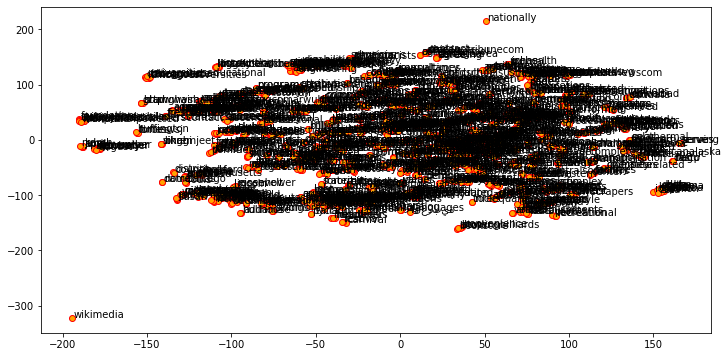

In [192]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0, n_iter=5000, perplexity=3)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(UIC_embed_df)
labels = unique_words

plt.figure(figsize=(12, 6))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

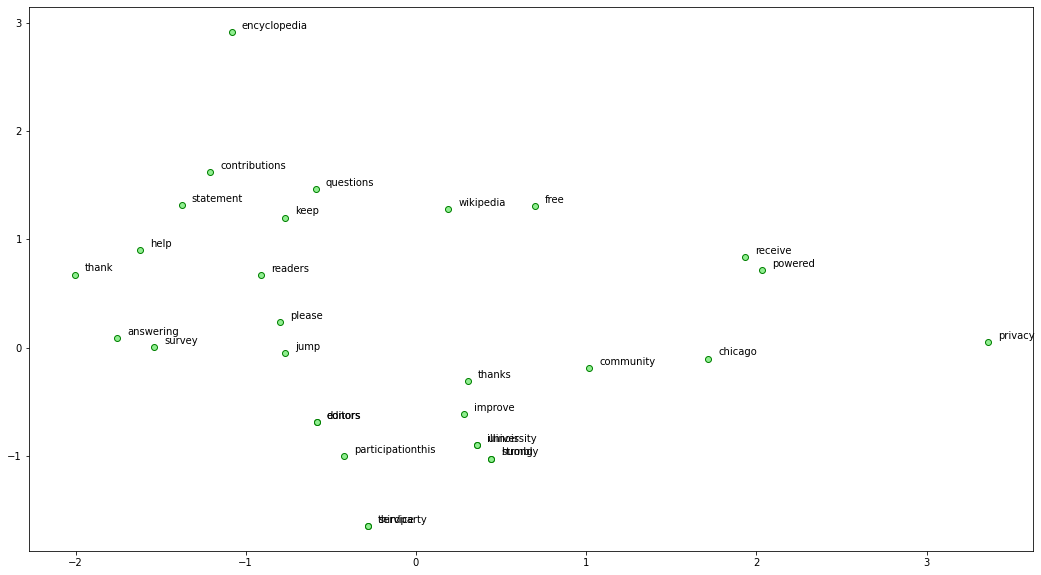

In [195]:

from sklearn.decomposition import PCA

P = principalComponents
plt.figure(figsize=(18, 10))
plt.scatter(P[10:40, 0], P[10:40, 1], c='lightgreen', edgecolors='g')
for label, x, y in zip(labels, P[10:40, 0], P[10:40, 1]):
    plt.annotate(label, xy=(x+0.06, y+0.03), xytext=(0, 0), textcoords='offset points')

In [0]:

# for list in UIC:
#   try:
#     u= embeddings_index[list] 
#   except KeyError:
#     print('word not in Glove')
#   norm_u = np.linalg.norm(u)
#   similarity = []
#   similar1 ={}

#   try:
#    for word in embeddings_index.keys():
#     v=embeddings_index[word]
#     cosine=np.dot(u,v)/norm_u/np.linalg.norm(v)
#     similarity.append((word, cosine))
#     print(len(similarity))

#     # sorted(similarity,key=lambda x: x[1], reverse=True)[:10]
#     similar1[word]= sorted(similarity,key=lambda x: x[1], reverse=True)[:1]
#   except KeyError:
#     print(1)





In [0]:
# !cd glove && make

In [0]:
# !./demo.sh

In [0]:
# if uniq[1] == UIC_pos_df.iloc[1,0]:
#   print(1)
# uniq[0]
# # df1.iloc[1,1] =1
# #  theta = np.zeros(X.shape[1])
# df1= pd.DataFrame(np.zeros(3,28)) 


In [0]:
# documents = ["UIC_pos_df", "Nytimes_pos_df"]
# tfidf = TfidfVectorizer().fit_transform(documents)

In [0]:
# UIC_tokenized = word_tokenize(file1)
# # print(UIC_tokenized)

# fdist = FreqDist(UIC_tokenized)
# print(fdist)
# fdist.most_common(2)
# # fdist.plot(40,cumulative=False)
# # plt.show()

# stop_words=set(stopwords.words("english"))
# len(stop_words)

# filtered_sent=[]
# for w in UIC_tokenized:
#     if w not in stop_words:
#         filtered_sent.append(w)
# # print("Filterd Sentence:",filtered_sent)
# # len(UIC_tokenized)
# # print(len(filtered_sent))
# # print(len(UIC_tokenized))

# ps = PorterStemmer()
# stemmed_words=[]
# for w in filtered_sent:
#     stemmed_words.append(ps.stem(w))
# # print("Stemmed Sentence:",stemmed_words)

# lemmatizer = WordNetLemmatizer()
# lemma_sample_text = []
# for w in filtered_sent:
#     lemma_sample_text.append(lemmatizer.lemmatize(w))
# # print(lemma_sample_text)



